<h1 style='background-color:#d100fb; font-size:50px; color:#000000; font-weight:bold;padding:20px'> PIG-E </h1>

<div style='font-size:30px; padding:5px'> Example using manual inputs of materials properties </div>
We use two orientation relationships in cementite as an example...
The values used for lattice parameters and elastic constants are from <a href="https://doi.org/10.1016/j.actamat.2017.10.070">Guziewski et al. 2018 Acta Mater. v144 p656</a>
and for interfacial energy comparison from <a href="https://doi.org/10.1016/j.actamat.2018.05.051">Guziewski et al. 2018 Acta Mater. v155 p1</a>.

<h2 style='background-color:#ed95ff; font-size:14px; color:#000000; font-weight:bold; padding:5px'> Necessary modules </h2>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

from PIG_E import *

<h2 style='background-color:#ed95ff; font-size:14px; color:#000000; font-weight:bold; padding:5px'> Optional modules </h2>

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

<h1 style='background-color:#d100fb; font-size:50px; color:#000000; font-weight:bold;padding:20px'>Input Material Information </h1>

<h2 style='background-color:#ed95ff; font-size:14px; color:#000000; font-weight:bold; padding:5px'> Information about the matrix </h2>

In [3]:
Matrix = CrystalProperties('BCC_A2')          # crystal structure in Thermo-Calc notation 

In [4]:
Matrix.InputLattice(a = 2.85,                 # lattice constants in Angstrom
                    b = 2.85,
                    c = 2.85,
                    alpha = 90,               # angles in degrees
                    beta = 90,
                    gamma = 90)

In [5]:
Matrix.InputElastic(Shear = 73.0,               # shear modulus in GPa
                   Poisson = 0.31)

<h2 style='background-color:#ed95ff; font-size:14px; color:#000000; font-weight:bold; padding:5px'> Information about the precipitate </h2>

<h3 style='background-color:#ed95ff; font-size:14px; color:#000000; font-weight:bold; padding:5px'> Cementite </h3>

In [9]:
Precip = CrystalProperties('CEMENTITE_D011')  # crystal structure in Thermo-Calc notation
Precip.InputLattice(a = 4.47,                 # lattice constants in Angstrom
                    b = 5.06,
                    c = 6.70,
                    alpha = 90,               # angles in degrees
                    beta = 90,
                    gamma = 90)

Precip.InputElastic(Shear = 71.7,           # shear modulus in GPa
                   Poisson = 0.30)

<h2 style='background-color:#ed95ff; font-size:14px; color:#000000; font-weight:bold; padding:5px'> Making sure everything is populated in the class instances like we want </h2>

In [10]:
print(f"The lattice parameter of the matrix is {Matrix.a} \u212B")
print(f"Poisson's ratio of the matrix is {Matrix.Poisson}")
print(f"The shear modulus of the matrix is {Matrix.ShearModulus} GPa")
print(f"The lattice parameters of {Precip.CrystalStructure} are {Precip.a}, {Precip.b}, {Precip.c} \u212B")
print(f"Poisson's ratio of {Precip.CrystalStructure} is {Precip.Poisson}")
print(f"The shear modulus of {Precip.CrystalStructure} is {Precip.ShearModulus} GPa")

The lattice parameter of the matrix is 2.85 Å
Poisson's ratio of the matrix is 0.31
The shear modulus of the matrix is 73.0 GPa
The lattice parameters of CEMENTITE_D011 are 4.47, 5.06, 6.7 Å
Poisson's ratio of CEMENTITE_D011 is 0.3
The shear modulus of CEMENTITE_D011 is 71.7 GPa


<h2 style='background-color:#ed95ff; font-size:14px; color:#000000; font-weight:bold; padding:5px'> Creating an Interface</h2>

In [11]:
ORinfo = CrystalInterface(Matrix, Precip) #Creates an instance of CrystalInterface as ORinfo
ORinfo.GetInterfaces() #Calling GetInterfaces() iterates over all possible ORs as definined in Steel_Info

<h1 style='background-color:#ed95ff; font-size:14px; color:#000000; font-weight:bold; padding:5px'> Calculating Elastic Interfacial Energy</h1>

In [13]:
Solution = {}
for Interface in ORinfo.FBToA.keys():
    
    Solution[Interface] = NonSingularIsotropicBimaterialInterfaceEnergy(Matrix, Precip, Interface, ORinfo)

    print(f"for {Precip.CrystalStructure} with {Interface} the interfacial energy is {np.round(Solution[Interface].InterfaceEnergy,2)} J/m2")

for CEMENTITE_D011 with Bagaryatski the interfacial energy is 0.51 J/m2
for CEMENTITE_D011 with Isaichev the interfacial energy is 0.37 J/m2


<h1 style='background-color:#d100fb; font-size:24px; color:#000000; font-weight:bold; padding:5px'> Orientation Relationship Functions </h1>

<p>The PIG_E code contains methods to allow the entry of new orientation relationships as a part of the {Material}_info.py companion module. To explain how an orientation relationship is entered, we will consider the Bain (Baker-Nutting) OR for a BCC/FCC interface in more detail. The Bain OR is defined as: </p>

<ul style='list-style-type:none'>

<li>$$\langle110\rangle_{FCC}//\langle010\rangle_{BCC}$$</li>
<li>$$\langle100\rangle_{FCC}//\langle110\rangle_{BCC}$$</li>
<li>$$\{001\}_{FCC}//\{001\}_{BCC}$$</li>
</ul>

<p>The Bain OR is illustrated below.</p>

<img src="./BainOR.jpg" width=300 height=200 alt="Bain OR">
                    

<style>
    table.dataframe dd { background-color: white !imporant; }
</style>
<p>The basic process of defining an OR in the code is as follows:</p>

<ol>
    <li><p>Define parallel crystallographic directions and planes</p>
        <ul style='list-style-type:none'>
            <li>
                <p>First the relevant lattice parameters are retreived from the CrystalInterface class.</p>
                <div style="text-align:center">
                    a_BCC = self.a_Matrix<br>
                    a_FCC = self.a1
                </div><br>
            </li>
            <li><p>The directions and planes of each phase are then stored in a phase-specific array where each row is a crystallogarphic direction/plane.</p>
                <p>The matrix array for Bain is:</p>
                <table>
                    <tr style="background-color:white"><td align='right'>BCC = np.array([[0.,1.,0.],</td><td>$$<010>_{BCC}$$</td></tr>
                    <tr style="background-color:white"><td align='right'>[1.,1.,0.],</td><td>$$<110>_{BCC}$$</td></tr>
                    <tr style="background-color:white"><td align='right'>[0.,0.,1.]])</td><td>$$\{001\}_{BCC}$$</td></tr>
                </table>
                <p>The precipitate array for Bain is:</p>
                <table>
                    <tr style="background-color:white"><td align='right'>FCC = np.array([[1.,1.,0.],</td><td>$$<110>_{FCC}$$</td></tr>
                    <tr style="background-color:white"><td align='right'>[1.,0.,0.],</td><td>$$<100>_{FCC}$$</td></tr>
                    <tr style="background-color:white"><td align='right'>[0.,0.,1.]])</td><td>$$\{001\}_{FCC}$$</td></tr>
                </table>
            </li>
        </ul>
    </li>
    <li><p>Orthogonalize and scale the OR</p>
        <p>While the convention of using vectors with coordinates in the crystal frame of reference is convenient for many crystallography tasks it poses some unique challenges when constructing orientation relationships. A solution is to convert from the crystal frame of reference to scaled fractional coordinates in a common orthonormal basis. This process is readily performed using the following transformation:</p>
        <p>$$\begin{bmatrix}u'\\v'\\w'\end{bmatrix}=\begin{bmatrix}
        a & b\cos{\gamma} & c\cos{\beta}\\
        0 & b\cos{\gamma} & -c\sin{\beta}\cos{\alpha^*}\\
        0 & 0 & c\sin{\beta}\sin{\alpha^*}\end{bmatrix}
        \begin{bmatrix}u\\v\\w\end{bmatrix}$$</p>
        <p>where a, b, and c are the lattice parameters and &alpha;, &beta;, and &gamma; are the lattice angles. &alpha;* is the angle in reciprocal cell angle correpsonding to &alpha;. It is determined from the the cosine rule as:</p> 
        <p>
            $$\cos{\alpha^*}=\frac{\cos{\beta}\cos{\gamma}-\cos{\alpha}}{\sin{\beta}\sin{\gamma}}$$
        </p>
        <p>
            Another useful tool for crystallographic computations is the metric tensor. The metric tensor, often denoted as $g$, enables simple computations of properties such as d-spacings or plane normal directions through matrix multiplication. The metric tensor is defined as $g_{ij}=e_i \cdot e_j$ where $e$ represents the crystal basis vectors. The resulting tensor is
        </p>
        <p>
            $$g=\begin{bmatrix} a^2 & ab \cos \gamma & ac \cos \beta \\ 
            ab \cos \gamma & b^2 & bc \cos \alpha \\ 
            ac \cos \beta & bc \cos \alpha & c^2 \end{bmatrix}$$    
        </p>
        <p>In PIG_E.py this transformation is applied to the directions in the OR to produce the OR_alpha (matrix) and OR_beta (precipitate) arrays using the CBtoRB (Crystal Basis to Reference Basis) transformation matrix stored as a property of the matrix and precipitate phases. Note that the third OR component, which defines the interfacial plane, must first be converted to the plane normal vector before applying the basis change. For cubic systems [uvw] the normal vectors are equivalent to (hkl) for the interface plane. However, for non-orthonormal systems this equivalence is not guaranteed. The fuction PlaneNormalVector accounts for this and returns [uvw] for the normal vector regardless of crystal system based on the Metric Tensor.</p>
        <div style="text-align:center">
            OR_alpha = np.array([np.matmul(Matrix.CBtoRB,BCC[0]),np.matmul(Matrix.CBtoRB,BCC[1]),np.matmul(Matrix.CBtoRB,self.PlaneNormalVector(BCC[2],Matrix.g))])<br>
            OR_beta = np.array([np.matmul(Precipitate.CBtoRB,FCC[0]),np.matmul(Precipitate.CBtoRB,FCC[1]),np.matmul(Precipitate.CBtoRB,PlaneNormalVector(FCC[2],Precipitate.g))])
        </div><br>
        <p>With the matrix and precipitate orientation relationship now represented in the same basis, the vectors representing the OR must be properly scaled to align the neareast neighbor atoms in the matrix and precipitate. This is accomplished in two steps: first by multiplying by SubUnitDict (which accounts for repeated sub units within a larger unit cell) and then dividing by the number of atomic positions along the crystal direction. Finally, the interface plane normal vector must be scaled such that its magnitude is the d-spacing of interface plane.</p>
        <div style="text-align:center">
            OR_alpha *= self.SubUnitDict['matrix']<br>            
            OR_beta *= self.SubUnitDict['precip']<br>
            OR_beta[0] /= 2.<br>
            OR_alpha[2] = PlaneSpacing([BCC[2],Matrix.g)*normalize(OR_alpha[2])<br>
            OR_beta[2] = PlaneSpacing(FCC[2],Precipitate.g)*normalize(OR_beta[2])<br>            
        </div>
        <p>Here in the case of the Bain OR, the $[1 1 0]$ direction in the FCC phase spans two atoms (see the Bain OR illustration) and hence is divided by 2.</p>
    </li>
    <li><p>Determine the Burger's vectors for the misfit dislocations in the matrix reference frame</p>
        <p>Finally, the Burger's vectors for the misfit dislocation are defined in the matrix reference frame. The Burger's vectors are defined as the unique closest packed directions that lie within the OR crystal plane. If we call the Burger's vectors $b_1$, $b_2$, etc., and the crystal plane $P$, then two conditions must be satisfied:</p>
        <ol>
            <li>$$b_i \cdot P = 0$$</li>
            <li>$$b_i \cdot b_j = 0$$</li>
        </ol>
    </li>    
    <p>A minimum of two Burger's vectors must be defined. However, orientation relationships containing higher symmmetry crystal planes will have more unique directions. For example the FCC $(1 1 1)$ plane has 3-fold symmetry and therefore requires three Burger's vectors.</p>
    <p>Finally, note that the Burger's vector is defined as a single inter-atomic displacement. As a result, the direction must be scaled by the correct prefactor. The resulting Burger's vectors for the Bain OR, as defined in the code, are:</p>
        <div style="text-align:center">
            b0 = a_BCC*np.array([1.,0.,0.],[0.,1.,0.])
        </div>
</ol>

<p>New ORs are defined as methods within the NewOrientationRelationships() class in the {Material}_info.py companion module. Example code for the Bain OR, as defined in the STEEL_info.py module, is included here with additional comments explaining the three steps.</p>


In [3]:
def Bain(self):
        #
        # Baker - Nutting (Bain) OR
        #

        '''
        1.  Define parallel crystallographic planes and directions
            Retrieve latice paramaters for both the matrix and precipiate phase stored as properties within the class.
            The lattice parameters are then stored as a_BCC and a_FCC for the matrix and precipitate, respectively.
        '''
        a_BCC = self.a_Matrix
        a_FCC = self.a1
    
        '''
            Define the parallel crystallographic directions and planes for the orientation relationship and store in arrays
            for the matrix and precipitate. Each row of the array corresponds to a crystallographic direction or plane. 
        '''
        BCC = np.array([[0.,1.,0.], #
                        [1.,1.,0.],
                        [0.,0.,1.]])
        FCC = np.array([[1.,1.,0.],
                        [1.,0.,0.],
                        [0.,0.,1.]])
        
        '''
        2.  Orthogonalize and scale the OR
            The orientation relationship in the crystal reference frame must be converted to scaled coordinates in an orthonormal basis.
            This process is performed by multiplying each crystal direction by the corresponding pre-computed transformation matrix (CBtoRB).
        '''
        OR_alpha = np.array([np.matmul(Matrix.CBtoRB,BCC[0]),
                             np.matmul(Matrix.CBtoRB,BCC[1]),
                             np.matmul(Matrix.CBtoRB,self.PlaneNormalVector(BCC[2],Matrix.g))])
        OR_beta = np.array([np.matmul(Precipitate.CBtoRB,FCC[0]),
                            np.matmul(Precipitate.CBtoRB,FCC[1]),
                            np.matmul(Precipitate.CBtoRB,PlaneNormalVector(FCC[2],Precipitate.g))])

        '''
            The OR arrays are then multiplied by the SubUnitDict. This will be explained in greater detail in a subsequent example. 
            Finally, in this example for Bain, the [1 1 0] direction for the FCC precipitate is scaled by a factor of 1/2. 
            This accounts for the number of atomic positions that lie in that direction.
        '''

        OR_beta[0] /= 2.
        OR_alpha[2] = PlaneSpacing(BCC[2],Matrix.g)*normalize(OR_alpha[2])
        OR_beta[2] = PlaneSpacing(FCC[2],Precipitate.g)*normalize(OR_beta[2])

        '''
        3.  Determine the Burger's vectors for the misfit dislocations in the matrix reference frame
            The misfit Burger's vectors are defined as the closest-packed directions within the OR plane for the matrix phase.
            A minimum of two Burger's vectors must be defined. However, higher symmetry interfaces may contain additional close packed
            dirctions. The dot product of a given Burger's vector with the other vectors and the interface plane must be zero.

            Note that the Burger's vector is defined as a single inter-atomic step and must be scaled with the correct prefactor.
        '''
        b0 = a_BCC*np.array([0.,1.,0.],[-1.,0.,0.])
        #b0 = a_FCC/2.*np.array([[1.,1.,0.],[1.,-1.,0.]]) * self.SubUnitDict['ref']
        
        return OR_alpha, OR_beta, b0

<h1 style='background-color:#ed95ff; font-size:14px; color:#000000; font-weight:bold; padding:5px'> Incorporating Subunits</h1>

<p>Often, the size of the unit cell for the matrix and precipitate phase will be significantly different. Let us consider cementite in a ferrite matrix as an example. Ferrite, a body-centered cubic phase with a typical lattice parameter of 2.85 &#8491;, has a unit cell volume of 23.15 $\unicode{x212B}^3$. Cementite ($Fe_3C$), an orthorhombic carbide with lattice parameters of 4.47, 5.06, 6.7 &#8491;, has a unit cell volume of 151.5 $\unicode{x212B}^3$. This significant difference in unit cell volume indicates that for certain orientation relationships one or more subunits will be required to obtain good alignment between the matrix and precipitate.</p>

<p>Let's look at the orientation relationships for cementite in more detail as an example of the InterfaceSubUnits. Two common orientation relationships are found for ferrite-cementite interfaces: Bagaryatski and Isaichev. The orientation relationships are defined as: </p>

<p>Bagaryatski</p>
<ul style='list-style-type:none'>
<li>$$\langle010\rangle_{Ortho}//\langle111\rangle_{BCC}$$</li>
<li>$$\langle100\rangle_{Ortho}//\langle1\bar{1}0\rangle_{BCC}$$</li>
<li>$$\{001\}_{Ortho}//\{11\bar{2}\}_{BCC}$$</li>
</ul>

<p>Isaichev</p>
<ul style='list-style-type:none'>
<li>$$\langle010\rangle_{Ortho}//\langle111\rangle_{BCC}$$</li>
<li>$$\langle101\rangle_{Ortho}//\langle01\bar{1}\rangle_{BCC}$$</li>
<li>$$\{10\bar{1}\}_{Ortho}//\{2\bar{1}1\}_{BCC}$$</li>
</ul>

<p>Examination of the in-plane vectors for Bagaryatski reveals that both the magnitude of the ferrite lattice vectors are approximately equal to that of the cementite lattice vectors. Thus, in this case no subunits are required. However, in the Isaichev OR this is not the case. The difference arises from the c-axis component in <nobr>$\langle101\rangle_{Ortho}//\langle01\bar{1}\rangle_{BCC}$.</nobr> For this lattice vector pair, the $\langle101\rangle_{Ortho}$ vector is approximately twice as long as the $\langle01\bar{1}\rangle_{BCC}$ vector. Hence, a subunit factor must be included to achieve good agreement between the ferrite and cementite lattices. This is illustrated below.</p>
<!-- - the a-c plane is below and the difference between the matrix subunits of Bagaryatski (1 Fe :1 Fe3C) and Isaichev (2 Fe : 1 Fe3C) can be seen...-->

<img src="cementiteORs.jpg" width=600 height=400 />

<p>It is important to note that the requirement for subunits is not specific to orthorhombic lattices. Instead it is solely a consequence of a mismatch between the size of the unit cells and the number of atomic positions that lie along a given lattice vector. As previously stated, significant differences in unit cell volume are a strong indicator that subunits may be required. This is typified by other carbide systems, such as $M_{23}C_6$. While $M_{23}C_6$ is a face-centered cubic phase, its large lattice parameter (10.49 &#8491;) necessitates the use of subunits to obtain good agreement with a ferrite matrix, regardless of the orientation relationship.</p>
                    


<p>As an example, a snippet from the GetSubUnits() dictionary for cementite is included:</p>
    
<p>'CEMENTITE_D011' : {</p>
<ul style='list-style-type:none'>
    <li>'Bagaryatski' : {<br>&nbsp;&nbsp;&nbsp;'matrix' : np.array([[1, <div style='color:#ee4154;display:inline-block;font-weight:bold'>1</div>, 1]]).T,<br>
        &nbsp;&nbsp;&nbsp;'precip' : np.array([[1,<div style='color:#ee4154;display:inline-block;font-weight:bold'>1</div>, 1]]).T}</li>
    <li>'Isaichev' : {<br>&nbsp;&nbsp;&nbsp;matrix : np.array([[1, <div style='color:#ee4154;display:inline-block;font-weight:bold'>2</div>, 1]]).T,<br>
        &nbsp;&nbsp;&nbsp;'precip' : np.array([[1, <div style='color:#ee4154;display:inline-block;font-weight:bold'>1</div>, 1]]).T}</li>
</ul>
<p>}</p>

<h1 style='background-color:#ed95ff; font-size:14px; color:#000000; font-weight:bold; padding:5px'> Plot Functions </h1>

<p>The PIG_E code contains methods to plot the mechanical fields (stress and displacement) contained within the interface energy calculation.</p>

<p>Within this section we show several examples displaying displacement, stress, and energy density fields associated with the cementite ($Fe_3C$) Precipitate. </p>

<h2 style='background-color:#ed95ff; font-size:14px; color:#000000; font-weight:bold; padding:5px'> Plot Displacements </h2>

<h3 style='background-color:#ed95ff; font-size:14px; color:#000000; font-weight:bold; padding:5px'> Invalid Input </h3>

In [15]:
Solution[Interface].PlotDisplacement(Field='uz') # invalid input.

usage: Object.PlotDisplacement(Field)

Field options are "ux" or "uy"


<h3 style='background-color:#ed95ff; font-size:14px; color:#000000; font-weight:bold; padding:5px'> Valid Input </h3>

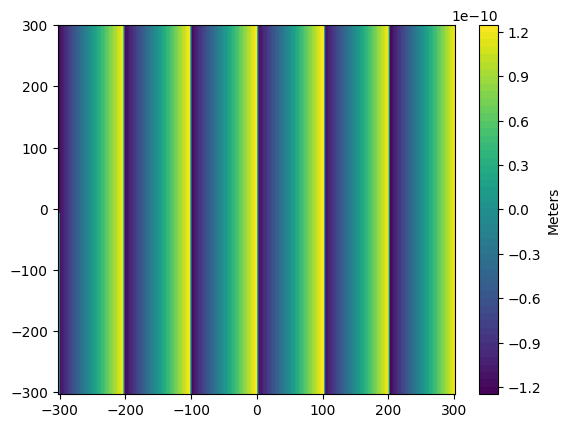

<Figure size 640x480 with 0 Axes>

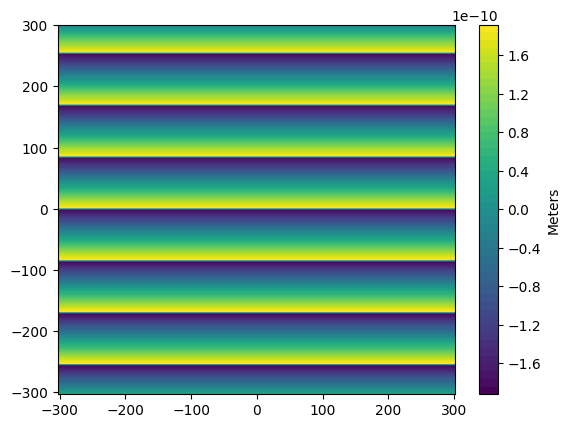

<Figure size 640x480 with 0 Axes>

In [18]:
Solution[Interface].PlotDisplacement(Field='ux')
Solution[Interface].PlotDisplacement(Field='uy')

<h2 style='background-color:#ed95ff; font-size:14px; color:#000000; font-weight:bold; padding:5px'> Plot Stress </h2>

<h3 style='background-color:#ed95ff; font-size:14px; color:#000000; font-weight:bold; padding:5px'> Invalid Input </h3>

In [19]:
Solution[Interface].PlotStress(Field='Sxy') # invalid input.

usage: Object.PlotStress(Field)

Field options are "Sxz" or "Syz"


<h3 style='background-color:#ed95ff; font-size:14px; color:#000000; font-weight:bold; padding:5px'> Valid Input </h3>

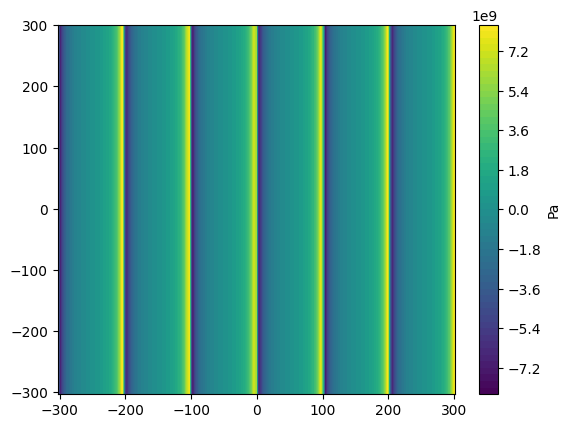

<Figure size 640x480 with 0 Axes>

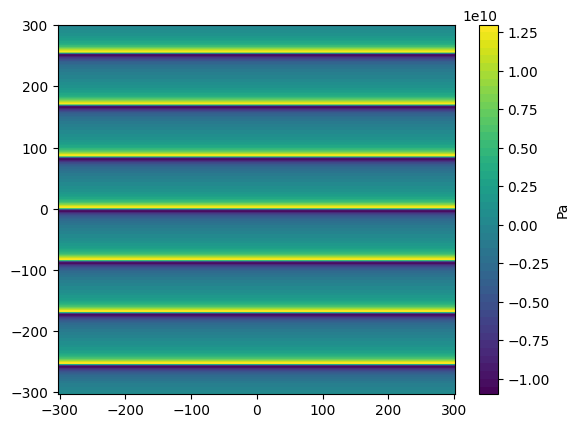

<Figure size 640x480 with 0 Axes>

In [20]:
Solution[Interface].PlotStress(Field='Sxz')
Solution[Interface].PlotStress(Field='Syz')

<h2 style='background-color:#ed95ff; font-size:14px; color:#000000; font-weight:bold; padding:5px'> Plot Energy Density </h2>

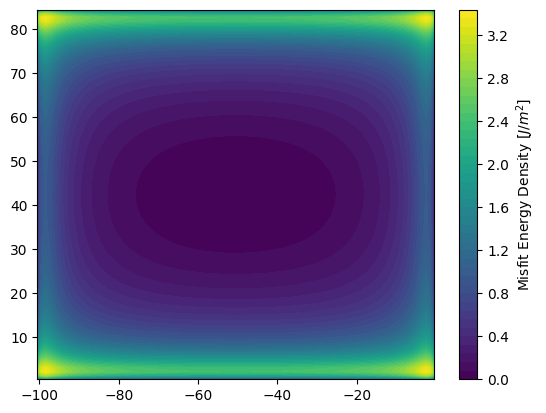

<Figure size 640x480 with 0 Axes>

In [21]:
Solution[Interface].PlotEnergyDensity()